<a href="https://colab.research.google.com/github/AmiMunshi/Data-compression-using-python/blob/master/AudioCompressionipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct
import numpy as np


In [16]:
#load the sound file in librosa
(sig, rate) = librosa.load("/content/marySongOrig.wav")
print(type(sig))
print(sig, rate)
print(sig.shape)

<class 'numpy.ndarray'>
[ 0.00161969  0.00551323  0.00910742 ... -0.02191469 -0.02373819
  0.        ] 22050
(159863,)


In [15]:
#play the sound file
ipd.Audio("/content/marySongOrig.wav")

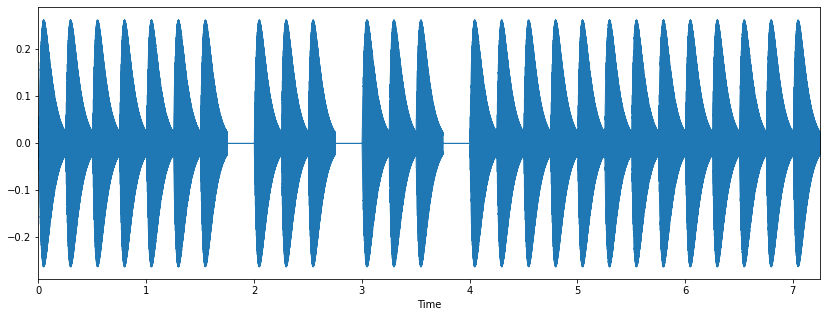

In [17]:
#Plot the sound wave
plt.figure(figsize=(14, 5))
librosa.display.waveplot(sig, rate)

In [ ]:
#Write the sound file by changing the signal rate
rate1= 22050
librosa.output.write_wav("output_new.wav", sig, rate1)

In [ ]:
ipd.Audio("/content/output_new.wav")

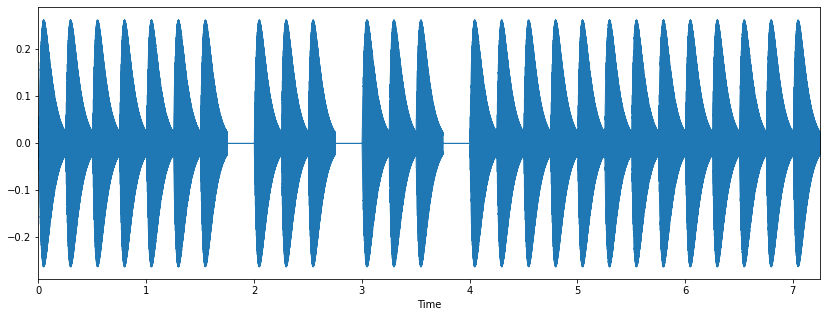

In [ ]:
#Plotting the wave with reduced signal rate
plt.figure(figsize=(14, 5))
librosa.display.waveplot(sig, rate1)

In [21]:
#Perform DCT on original signal
sig_dct= dct( sig, axis=0, norm='ortho' )

In [22]:
x= len(sig)

In [30]:
sig_thresh= np.zeros(x)
B= abs(sig_dct)
B=np.sort(B)
P=1
n= int((1-P/100)*x) #n= no. of pixels to be retained using P
retain= B[n: len(B)] # Retaining top P percent coefficients

for i in range (x):
  if sig_dct[i] in retain:
    sig_thresh[i]= sig_dct[i]


In [31]:
#Retriveing the original sound after compression using idct
sig_comp= idct(sig_thresh, axis=0, norm='ortho')

In [32]:
#finding nonzero values in the compressed matrix
nonzeros= np.sum([sig_thresh!=0])
print(nonzeros)

806


In [33]:
#Compression Ratio
CR= (x)/nonzeros
print(CR)

198.3411910669975


In [34]:
#Write the compressed sound file 
librosa.output.write_wav("Output_Compressed.wav", sig_comp, rate)

In [35]:
sig_compressed, rate3= librosa.load("/content/Output_Compressed.wav")

In [36]:
ipd.Audio(sig_compressed, rate=22050)